Dataset Preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Model Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Predicted Species: Iris-setosa


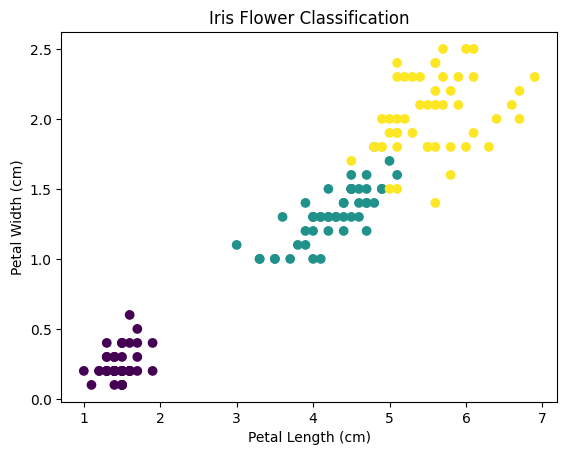

In [ ]:

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Step 2: Load the dataset
df = pd.read_csv("Iris.csv")

print("Dataset Preview:")
print(df.head())


# Step 3: Drop unnecessary column
df = df.drop('Id', axis=1)


# Step 4: Encode target labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


# Step 5: Split features and target
X = df.drop('Species', axis=1)
y = df['Species']


# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Step 7: Train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


# Step 8: Make predictions on test data
y_pred = model.predict(X_test)


# Step 9: Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Step 10: Predict species for a new flower (Correct way)
sample_flower = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=X.columns
)

prediction = model.predict(sample_flower)

print("\nPredicted Species:", le.inverse_transform(prediction)[0])


# Step 11: Visualization
plt.figure()
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Flower Classification")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')